In [20]:
# Ragib Guliyev
# 150210920

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [22]:
# Linearly separable dataset
d1, y1 = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=1.5)

# Linearly non-separable dataset
d2, y2 = make_circles(n_samples=200, factor=0.5, noise=0.1, random_state=42)

# Selecting 10 vectors from each class for the test
np.random.seed(42)
test_d1 = np.hstack([np.random.choice(np.where(y1 == i)[0], 10, replace=False) for i in np.unique(y1)])
test_d2 = np.hstack([np.random.choice(np.where(y2 == i)[0], 10, replace=False) for i in np.unique(y2)])

# Training and test sets for D1
X_train_d1, X_test_d1 = np.delete(d1, test_d1, axis=0), d1[test_d1]
y_train_d1, y_test_d1 = np.delete(y1, test_d1, axis=0), y1[test_d1]

# Training and test sets for D2
X_train_d2, X_test_d2 = np.delete(d2, test_d2, axis=0), d2[test_d2]
y_train_d2, y_test_d2 = np.delete(y2, test_d2, axis=0), y2[test_d2]

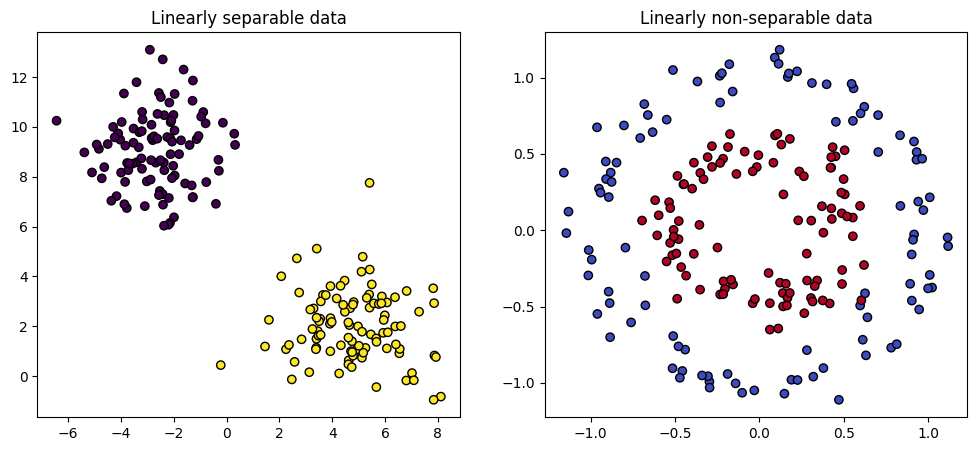

In [23]:
# Plot of the data points for D1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(d1[:, 0], d1[:, 1], c=y1, cmap='viridis', edgecolors='k')
plt.title('Linearly separable data')

# Plot of the data points for D2
plt.subplot(1, 2, 2)
plt.scatter(d2[:, 0], d2[:, 1], c=y2, cmap='coolwarm', edgecolors='k')
plt.title('Linearly non-separable data')
plt.show()

In [24]:
# Hard-margin SVM for D1
hm_svm = SVC(kernel='linear', C=1e10)
hm_svm.fit(X_train_d1, y_train_d1)
y_pred_d1 = hm_svm.predict(X_test_d1)
acc_d1 = accuracy_score(y_test_d1, y_pred_d1)

In [25]:
# Soft-margin SVM for D2
sm_svm = SVC(kernel='linear', C=1.0)
sm_svm.fit(X_train_d2, y_train_d2)
y_pred_d2 = sm_svm.predict(X_test_d2)
acc_d2 = accuracy_score(y_test_d2, y_pred_d2)

In [26]:
# Two-layer MLP for D1 and D2
mlp_d1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_d1.fit(X_train_d1, y_train_d1)
y_pred_mlp_d1 = mlp_d1.predict(X_test_d1)
acc_mlp_d1 = accuracy_score(y_test_d1, y_pred_mlp_d1)

mlp_d2 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_d2.fit(X_train_d2, y_train_d2)
y_pred_mlp_d2 = mlp_d2.predict(X_test_d2)
acc_mlp_d2 = accuracy_score(y_test_d2, y_pred_mlp_d2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
d1_resuslts = pd.DataFrame({
    'X1': X_test_d1[:, 0],
    'X2': X_test_d1[:, 1],
    'True': y_test_d1,
    'Predicted': y_pred_d1
})

d2_results = pd.DataFrame({
    'X1': X_test_d2[:, 0],
    'X2': X_test_d2[:, 1],
    'True': y_test_d2,
    'Predicted': y_pred_d2
})

print("Test results for D1")
print(d1_resuslts)
print("\nTest results for D2")
print(d2_results)

Test results for D1
          X1         X2  True  Predicted
0  -5.387354   8.974515     0          0
1  -2.146254   6.144366     0          0
2  -3.227959   8.735798     0          0
3  -1.726285   9.459763     0          0
4  -0.962698  10.411206     0          0
5  -6.438815  10.247140     0          0
6  -2.682670   8.562631     0          0
7  -3.888334  11.339188     0          0
8  -2.562937  11.361252     0          0
9  -4.102653   9.724675     0          0
10  5.152513   4.787426     1          1
11  5.576059   2.915688     1          1
12  7.924583   0.760722     1          1
13  7.839429  -0.954962     1          1
14  5.662808   1.507770     1          1
15  6.384624   1.988519     1          1
16  4.753586   0.957427     1          1
17  4.621509   0.627288     1          1
18  6.070881   2.950257     1          1
19  3.396386   1.132898     1          1

Test results for D2
          X1        X2  True  Predicted
0   0.703593  0.753618     0          0
1  -0.304183 -0.95

In [28]:
results = {
    "D1 hard-margin SVM accuracy": acc_d1,
    "D2 soft-margin SVM accuracy": acc_d2,
    "D1 MLP accuracy": acc_mlp_d1,
    "D2 MLP accuracy": acc_mlp_d2
}
print("\nOverall results:")
for key, value in results.items():
    print(f"{key}: {value}")


Overall results:
D1 hard-margin SVM accuracy: 1.0
D2 soft-margin SVM accuracy: 0.4
D1 MLP accuracy: 1.0
D2 MLP accuracy: 1.0
